# Test-benchmark using fake data

In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
import warnings
warnings.filterwarnings("ignore")

# to remplace with pip install abench and uqmodels
path = '../'
sys.path.insert(1, path)
sys.path.insert(1, path+'src')
import abench as abench
import uqmodels as uqmodels
import abench.store as A_store
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib notebook

if(True):
    from IPython.core.display import display, HTML
    display(HTML(
        '<style>'
            '#notebook { padding-top:0px !important; } ' 
            '.container { width:85% !important; } '
            '.end_space { min-height:0px !important; } '
        '</style>'
    ))
    

In [4]:
from abench.store import get_data_generator,store_data_generator,get_cv_list,get_model_result,get_dataset
from abench.benchmark import analyse_data_generator
# Chose data set and sub experiment steup :

dataset = 'real' # 'syn'
#Subexperiment : 
dict_subexp = {'real':['deg0_seq100', 'deg0_seq98', 'deg1_seq100', 'deg1_seq98', 'deg2_seq100', 'deg_seq98'],
             'syn':['deg1_seq100','deg1_seq97']}

subexp = dict_subexp[dataset][3]

#dataset = 'syn'
#subexp = dict_subexp[dataset][0]

print(dataset,subexp)

if(dataset=='real'):
    storing = path + 'results/Benchmark_real_injection_learning'
    list_subset_name = ['Low-var','Mid-var','High-var']
    list_name_norm =  ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
    cv_list_norm = ['cv_0','cv_0_bis1','cv_1','cv_1_bis1']
    if(subexp=='deg0_seq100'): # 
        cv_list_deg = ['cv_0_deg0_seq100','cv_0_deg0_seq100_bis1','cv_1_deg0_seq100','cv_1_deg0_seq100_bis1']
    elif(subexp=='deg1_seq100'): #     
        cv_list_deg = ['cv_0_deg1_seq100','cv_0_deg1_seq100_bis1','cv_1_deg1_seq100','cv_1_deg1_seq100_bis1']
    elif(subexp=='deg2_seq100'): # 
        cv_list_deg = ['cv_0_deg2_seq100','cv_0_deg2_seq100_bis1','cv_1_deg2_seq100','cv_1_deg2_seq100_bis1']
    elif(subexp=='deg0_seq98'): # 
        cv_list_deg = ['cv_0_deg0_seq98','cv_0_deg0_seq98_bis1','cv_1_deg0_seq98','cv_1_deg0_seq98_bis1']
    elif(subexp=='deg1_seq98'): # 
        cv_list_deg = ['cv_0_deg1_seq98','cv_0_deg1_seq98_bis1','cv_1_deg1_seq98','cv_1_deg1_seq98_bis1']
    elif(subexp=='deg2_seq98'): # 
        cv_list_deg = ['cv_0_deg2_seq98','cv_0_deg2_seq98_bis1','cv_1_deg2_seq98','cv_1_deg2_seq98_bis1']
    
elif(dataset=='syn'):
    list_subset_name = ['nominal','aletered']
    storing = path +'results/Benchmark_synthetic_injection_learning'
    list_name_norm =  ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
    cv_list_norm = ['cv_0','cv_0_bis1','cv_1','cv_1_bis1']
    if(subexp=='deg1_seq100'): # 
        cv_list_deg = ['cv_0_deg1_seq100','cv_0_deg1_seq100_bis1','cv_1_deg1_seq100','cv_1_deg1_seq100_bis1']
    elif(subexp=='deg1_seq97'): # 
        cv_list_deg = ['cv_0_deg1_seq97','cv_0_deg1_seq97_bis1','cv_1_deg1_seq97','cv_1_deg1_seq97_bis1']
else:
    print('Bad dataset name')

print(dataset,subexp)
print('List of all subexp cross val set for '+dataset+'real dataset')
dataset_generator = get_data_generator(storing)
analyse_data_generator(dataset_generator)

colors = ['black','lightgrey','gray','dimgray',
          'darkgoldenrod','gold','orange','darkorange',
          'darkred','pink','tomato','red',
          'darkgreen','lightgreen','lawngreen','green',
          'darkblue','lightblue','cyan','teal','darkblue']

colors = ['black','gray','red','pink','green','lime','blue','cyan','yellow','gold']

# Associate name and color to experiment
list_name = []
colors_ = []
for i in range(len(list_name_norm)):
    list_name.append(list_name_norm[i])
    colors_.append(colors[i*2])
    # Choose the ctx altered :
    #list_name.append(list_name_norm[i]+'_deg0')
    #colors_.append(colors[i*4+1])
    list_name.append(list_name_norm[i]+'_d')
    colors_.append(colors[i*2+1])
    #list_name.append(list_name_norm[i]+'_deg2')
    #colors_.append(colors[i*4+3])

real deg1_seq98
real deg1_seq98
List of all subexp cross val set for realreal dataset
% train for each sub sample for each set
cv_0  len 8473 %train/test/drop: [22.  43.1 17.1] [4.9 9.2 3.7] [0. 0. 0.]
cv_1  len 10297 %train/test/drop: [22.2 43.  17.1] [4.9 9.2 3.7] [0. 0. 0.]
cv_0_bis1  len 8473 %train/test/drop: [22.  43.1 17.1] [4.9 9.2 3.7] [0. 0. 0.]
cv_1_bis1  len 10297 %train/test/drop: [22.2 43.  17.1] [4.9 9.2 3.7] [0. 0. 0.]
cv_0_deg0_seq100  len 8473 %train/test/drop: [ 0.  43.1 17.1] [4.9 9.2 3.7] [22.  0.  0.]
cv_1_deg0_seq100  len 10297 %train/test/drop: [ 0.  43.  17.1] [4.9 9.2 3.7] [22.2  0.   0. ]
cv_0_deg0_seq100_bis1  len 8473 %train/test/drop: [ 0.  43.1 17.1] [4.9 9.2 3.7] [22.  0.  0.]
cv_1_deg0_seq100_bis1  len 10297 %train/test/drop: [ 0.  43.  17.1] [4.9 9.2 3.7] [22.2  0.   0. ]
cv_0_deg1_seq100  len 8473 %train/test/drop: [22.   0.  17.1] [4.9 9.2 3.7] [ 0.  43.1  0. ]
cv_1_deg1_seq100  len 10297 %train/test/drop: [22.2  0.  17.1] [4.9 9.2 3.7] [ 0. 43.  0.]

<IPython.core.display.Javascript object>


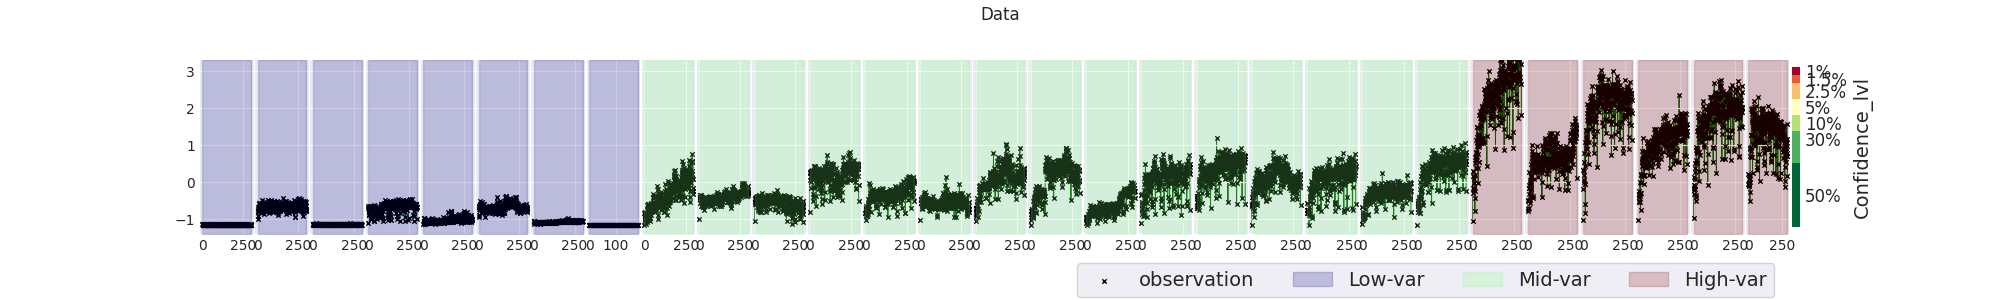

<IPython.core.display.Javascript object>


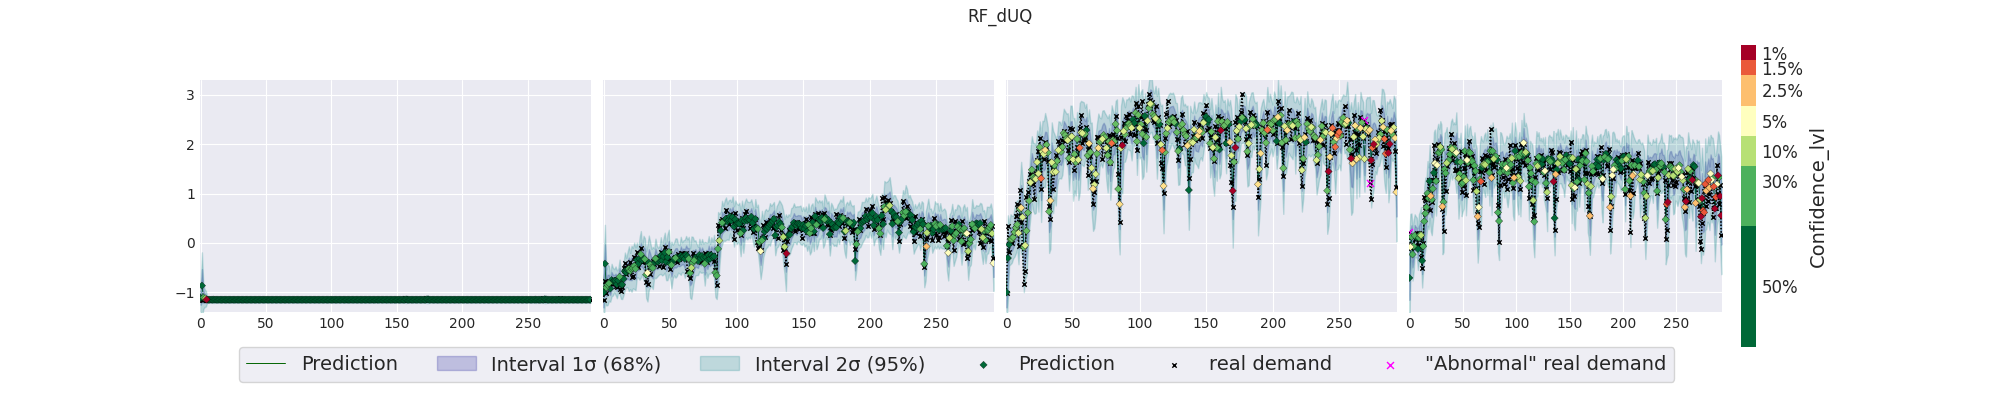

<IPython.core.display.Javascript object>


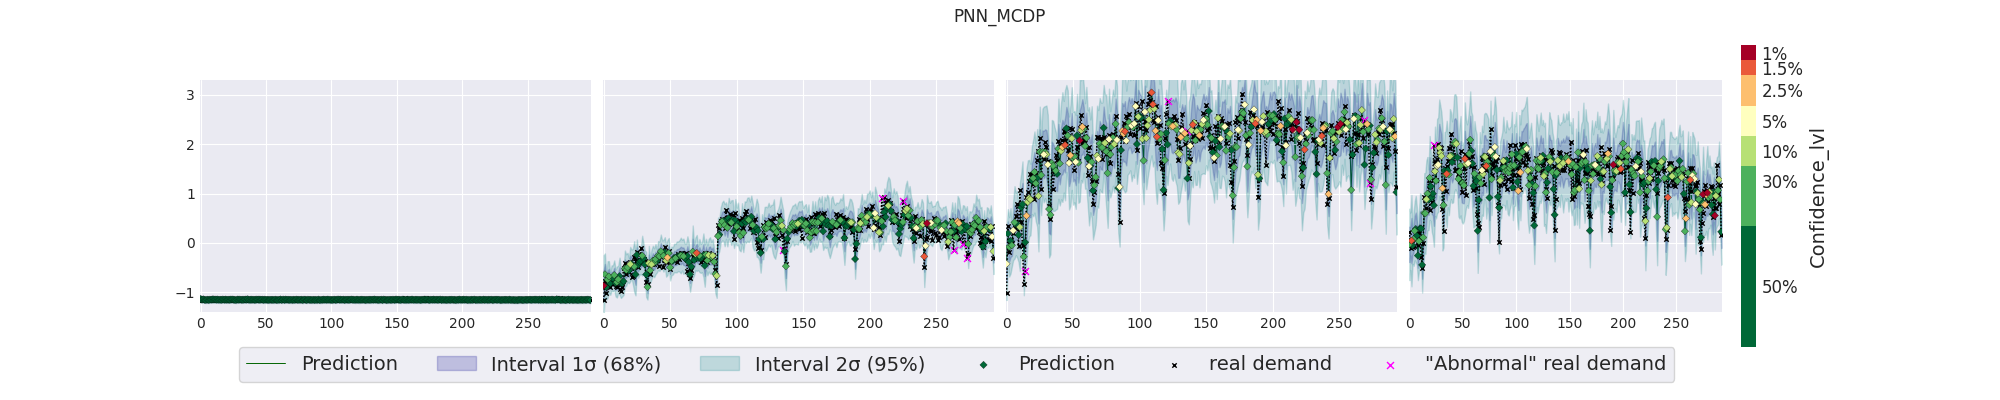

<IPython.core.display.Javascript object>


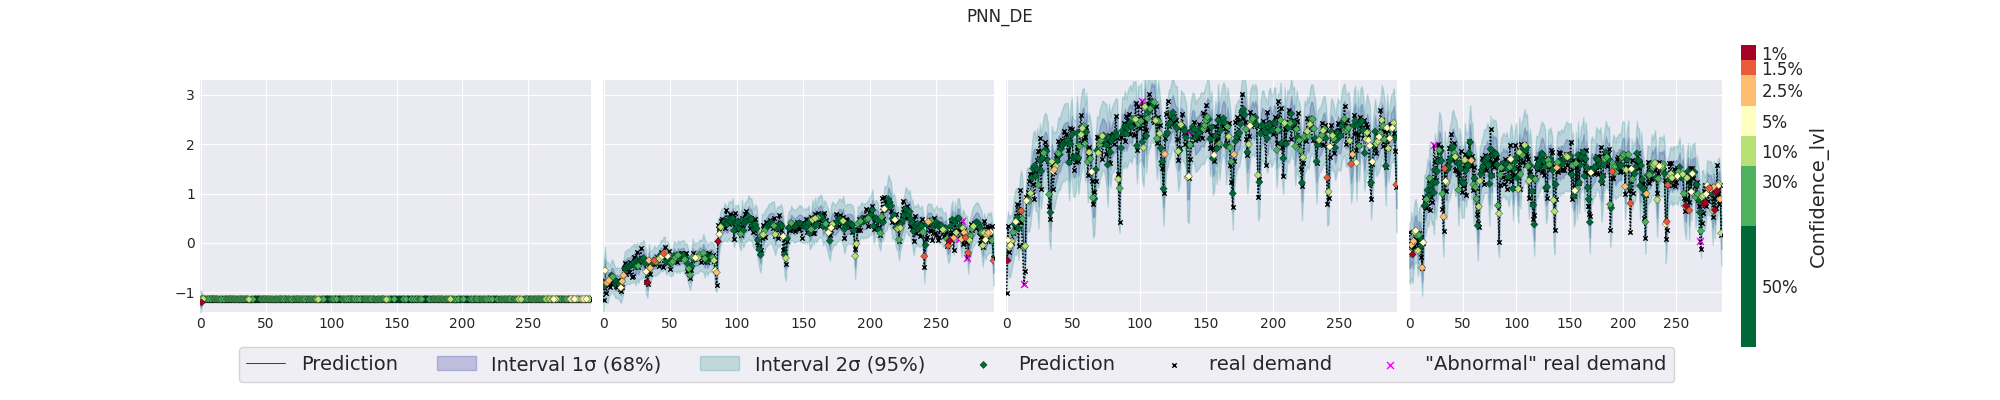

<IPython.core.display.Javascript object>


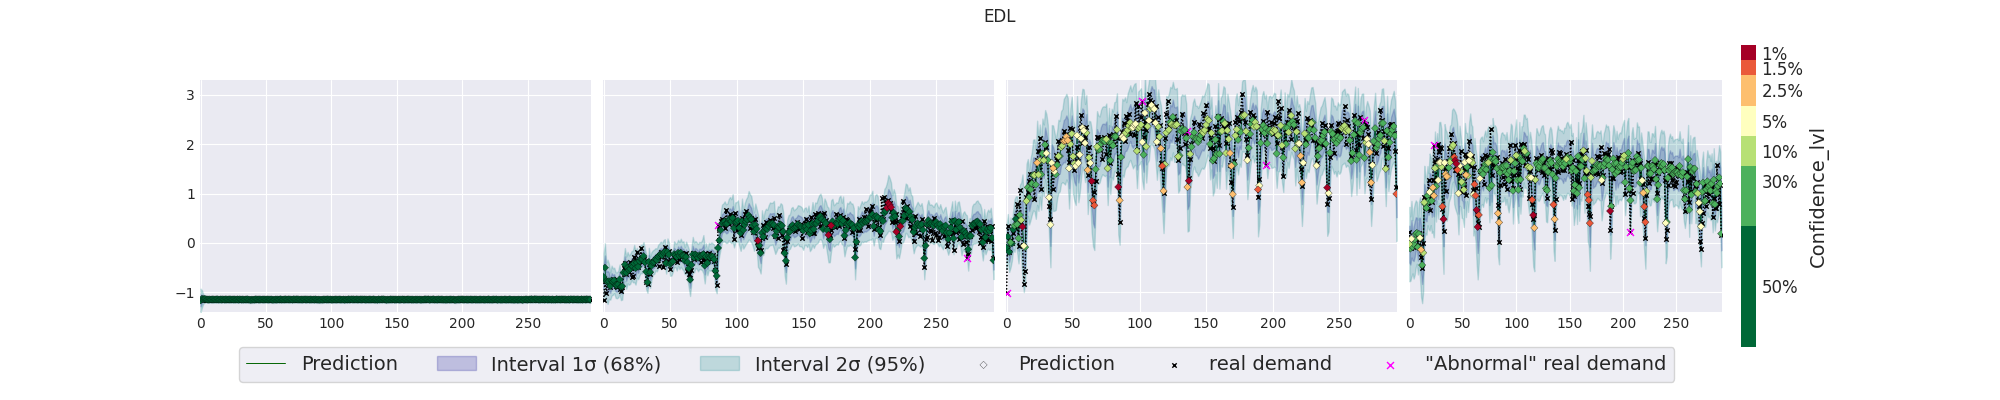

In [14]:
# Plot models results# Plot models results
import numpy as np
from abench.benchmark import plot_curve
from src.visu import uncertainty_plot
X,y,split,context,_,cv_name = get_dataset(storing,cv_list_norm[0])
f_obs = np.arange(len(context)) # all data
#f_obs = np.arange(len(split))[split==0][450:650] # Small sample of test set
if(dataset=='real'):
    subseries_sets=[[],[],[]]
    for i in range(29):
        subseries_sets[int(context[:,-1][context[:,1]==i][0])].append(i)
    ind_ctx = [4, 13, 14, 17, 22, 23, 25, 28,0, 2, 3, 5, 6, 7, 9, 10, 11, 12, 15, 16, 19, 20, 24,1, 8, 18, 21, 26, 27]
    param={'mode_res':False,'f_obs':f_obs,'dim':0,'only_data':True,'ctx_attack':(-1,-1),'list_name_subset':list_subset_name,"split_ctx":1,"ind_ctx":ind_ctx,'ylim':(-1.4,3.3)}
    plot_curve(storing,  [list_name_norm[0]], uncertainty_plot, cv_list_norm[0], plot_param=param,size=(20,3))
    ind_ctx= [4,10,18,subseries_sets[2][5]]
    f_obs = np.arange(len(context))[[ i in ind_ctx for i in context[:,1]]] # Small sample of test set
    param={'mode_res':False,'f_obs':f_obs,'dim':0,'var_min':(0.001,0.00001),'only_data':False,'list_name_subset':list_subset_name,"split_ctx":1,"ind_ctx":ind_ctx,'ylim':(-1.4,3.3)}
    plot_curve(storing, list_name_norm, uncertainty_plot, cv_list_norm[0], plot_param=param,size=(20,4))
else:
    param={'mode_res':False,'f_obs':f_obs,'dim':0,'only_data':True,'ctx_attack':(-1,-1),'list_name_subset':list_subset_name}
    plot_curve(storing,  [list_name_norm[0]], uncertainty_plot, cv_list_norm[0], plot_param=param,size=(20,3))
    ind_ctx= [4,10,18]
    f_obs = np.arange(8000,8400) # Small sample of test set
    param={'mode_res':False,'f_obs':f_obs,'dim':0,'var_min':(0.001,0.00001),'only_data':False,'list_name_subset':list_subset_name}
    plot_curve(storing, list_name_norm, uncertainty_plot, cv_list_norm[0], plot_param=param,size=(25,4))

cv_0 len_train 6965
cv_1 len_train 8473
cv_0_bis1 len_train 6965
cv_1_bis1 len_train 8473
RF_dUQ  |time_fit : 3.56 time_pred : 4.18
Rmse Train 0.143 ± 0.003 | TEST 0.236 ± 0.015
NLL Train -0.798 ± 0.015 | TEST -0.506 ± 0.053
Cov Train 0.991 ± 0.001 | TEST 0.951 ± 0.01
Sharp Train 0.725 ± 0.009 | TEST 0.831 ± 0.01

PNN_MCDP  |time_fit : 584.74 time_pred : 24.79
Rmse Train 0.17 ± 0.004 | TEST 0.226 ± 0.017
NLL Train -0.804 ± 0.017 | TEST -0.548 ± 0.075
Cov Train 0.986 ± 0.001 | TEST 0.949 ± 0.013
Sharp Train 0.766 ± 0.012 | TEST 0.813 ± 0.007

PNN_DE  |time_fit : 2036.57 time_pred : 5.98
Rmse Train 0.153 ± 0.004 | TEST 0.211 ± 0.019
NLL Train -0.848 ± 0.017 | TEST -0.581 ± 0.087
Cov Train 0.99 ± 0.001 | TEST 0.952 ± 0.013
Sharp Train 0.702 ± 0.021 | TEST 0.73 ± 0.018

EDL  |time_fit : 575.75 time_pred : 1.24
Rmse Train 0.164 ± 0.008 | TEST 0.217 ± 0.014
NLL Train -0.824 ± 0.029 | TEST -0.556 ± 0.087
Cov Train 0.98 ± 0.001 | TEST 0.939 ± 0.016
Sharp Train 0.709 ± 0.028 | TEST 0.717 ± 0.01

<IPython.core.display.Javascript object>


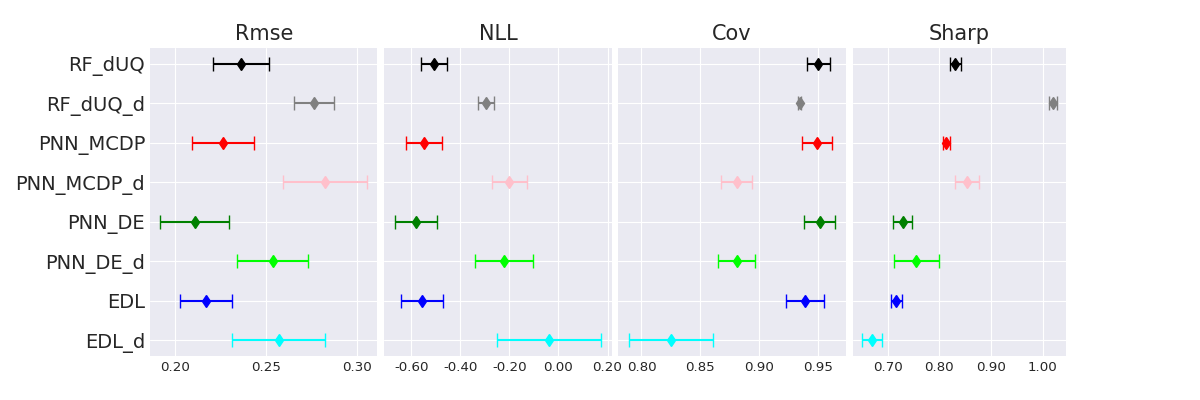

In [7]:
# Compute Global Performances 
from src.Benchmark_UQ import rmse, mae, average_coverage,sharpness,Gaussian_NLL
from abench.benchmark import Generic_metric,evaluate,barplot_ctx

list_metrics = [Generic_metric(rmse,'Rmse', mask=None,list_ctx_constraint=None,reduce=True),
                Generic_metric(Gaussian_NLL,'NLL',mask=None,list_ctx_constraint=None,reduce=True),
                Generic_metric(average_coverage,"Cov", mask=None,list_ctx_constraint=None,reduce=True),
                Generic_metric(sharpness,"Sharp", mask=None,list_ctx_constraint=None,reduce=True,type_var ="all")]

dict_perf = evaluate(storing, list_name_norm, list_metrics,verbose=1,cv_list=cv_list_norm)
# Enrich dict_perf with injection experiment
dict_perf = evaluate(storing, list_name_norm, list_metrics,dict_perf=dict_perf,verbose=0,suffixe_name='_d',cv_list=cv_list_deg)

from  abench.benchmark import scatter_result, barplot_result
ylim =  [None, None]
list_ = list_name

barplot_result(dict_perf=dict_perf, 
               Name_metrics=['Rmse','NLL','Cov','Sharp'], 
               Name_candidates= list_, 
               colors=colors_, 
               target=[None,None],
               xlim =  [None,None,None,None,None,None],
               figsize=(12,4))

cv_0 len_train 6965
cv_1 len_train 8473
cv_0_bis1 len_train 6965
cv_1_bis1 len_train 8473
cv_0_deg1_seq98 len_train 3525
cv_1_deg1_seq98 len_train 4253
cv_0_deg1_seq98_bis1 len_train 3525
cv_1_deg1_seq98_bis1 len_train 4253


<IPython.core.display.Javascript object>


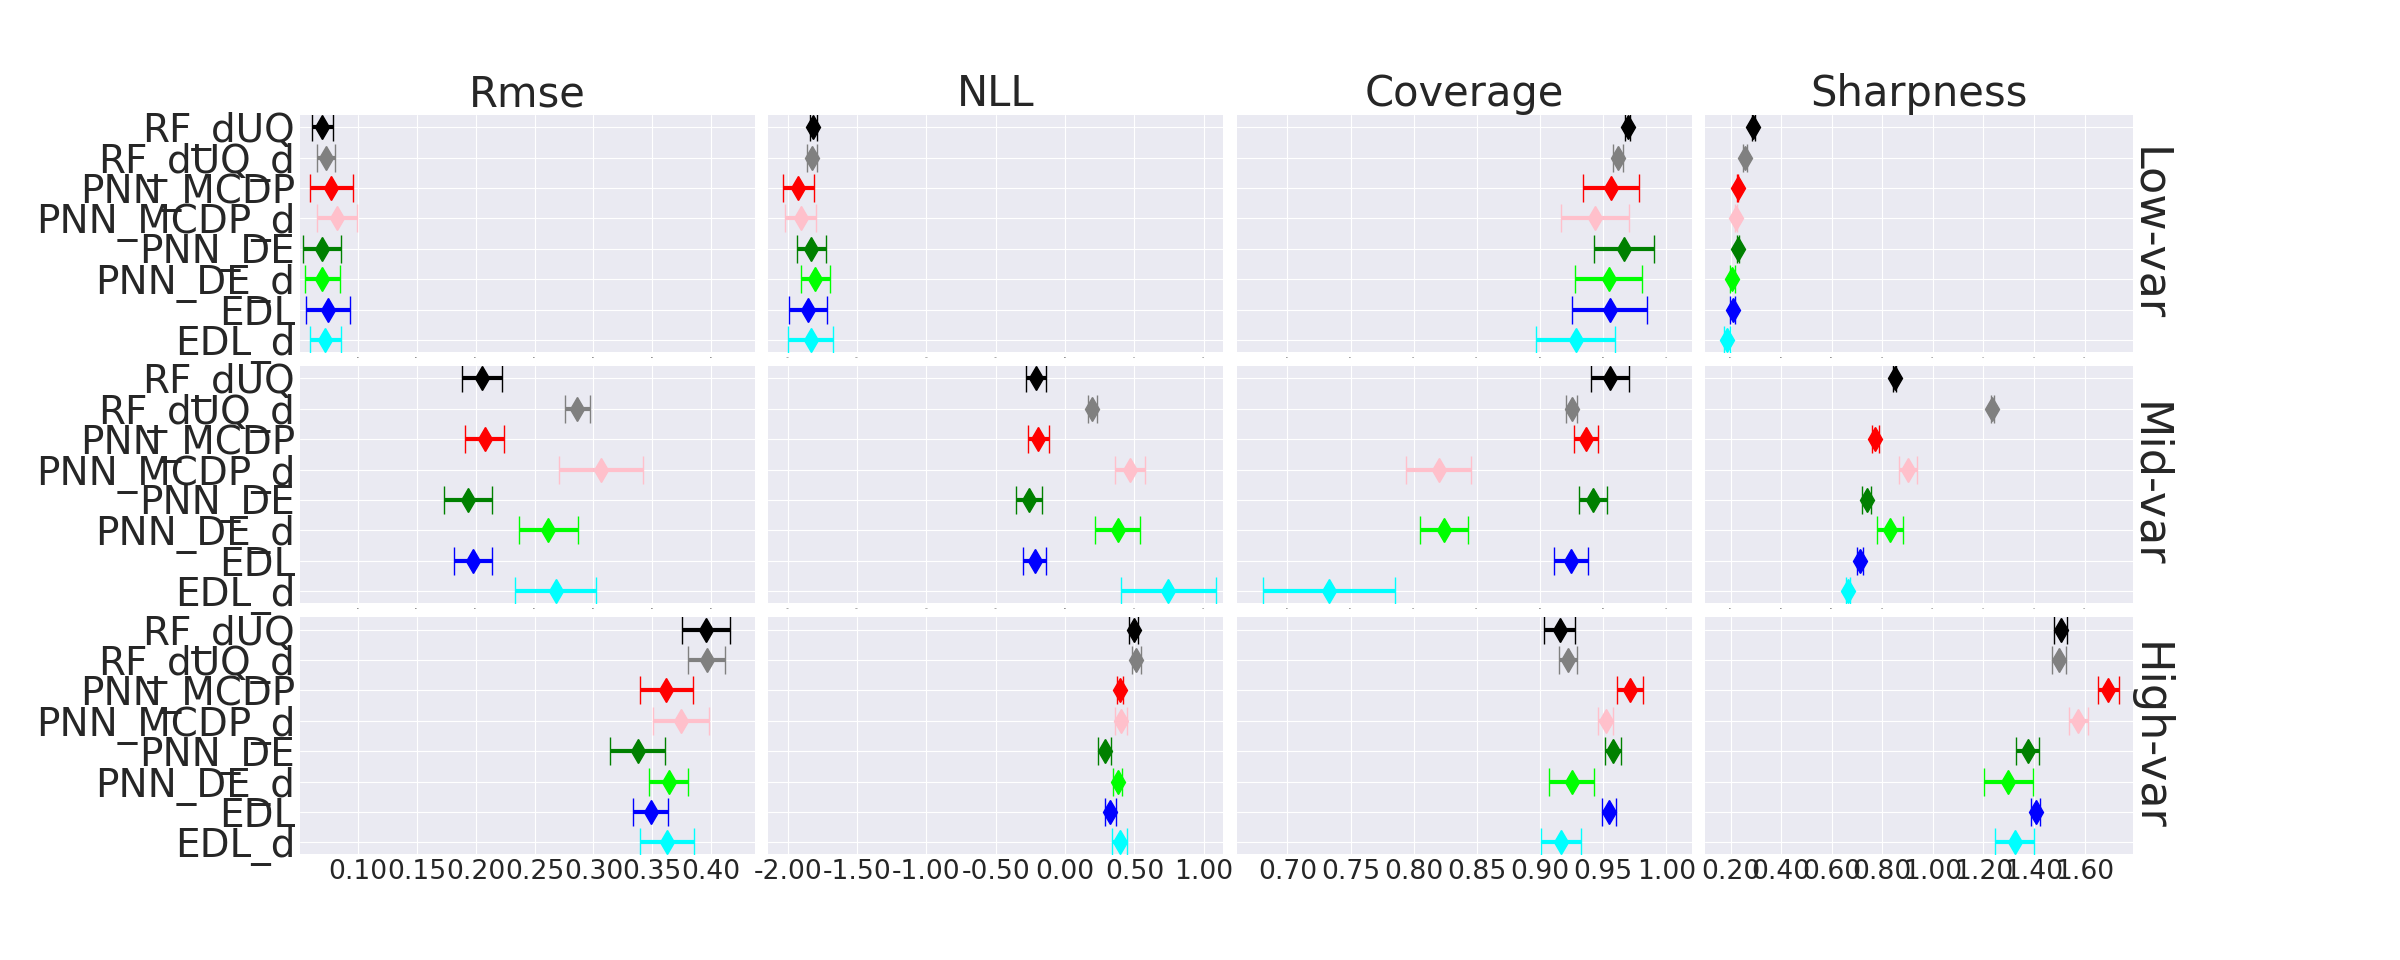

<IPython.core.display.Javascript object>


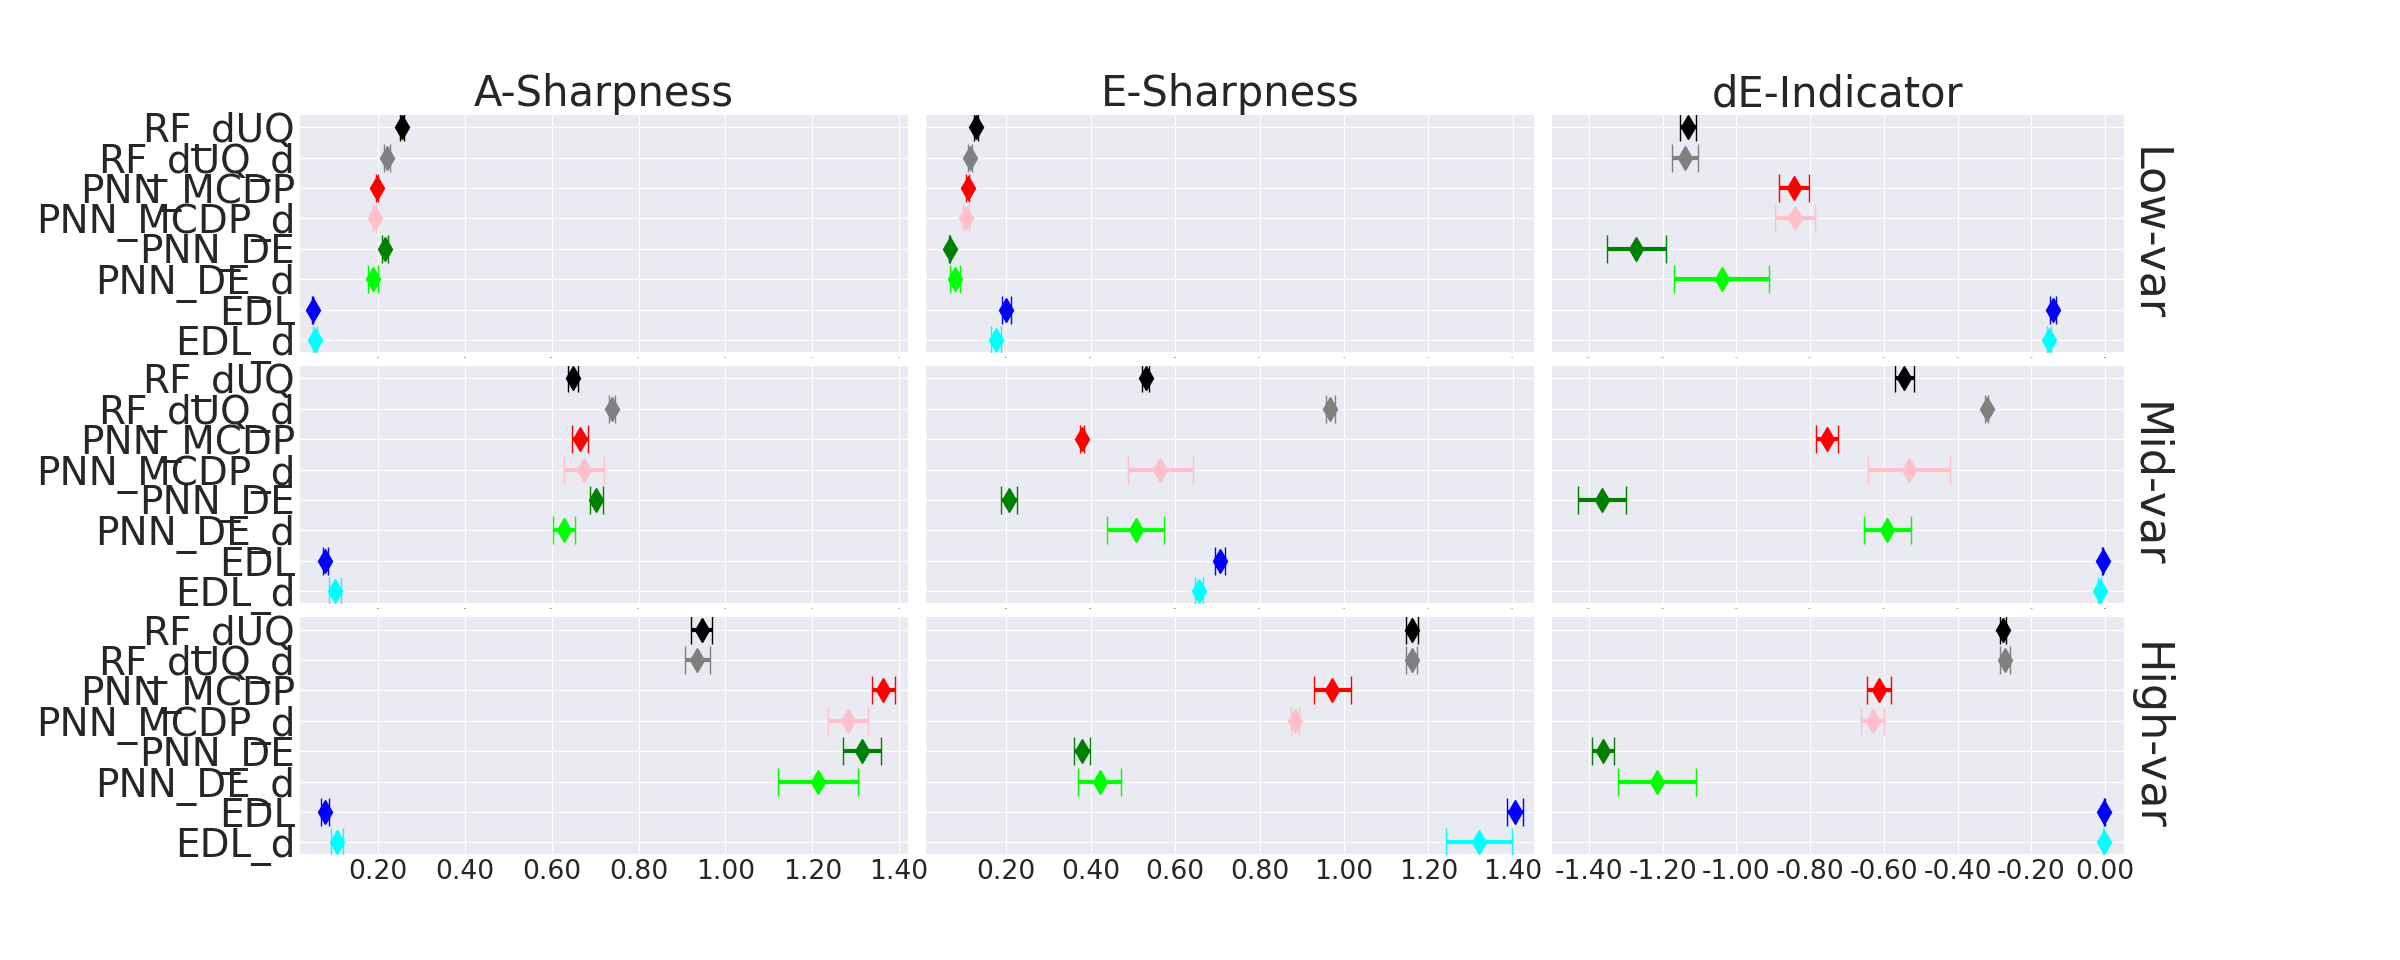

In [8]:
# Compute local performance using subset partition

from src.Benchmark_UQ import rmse, mae, average_coverage,sharpness,Gaussian_IC_errors,dEI,Gaussian_NLL
from abench.benchmark import Generic_metric,evaluate,barplot_ctx

list_metrics =[Generic_metric(rmse,'Rmse',mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(average_coverage,"Coverage", mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(Gaussian_NLL,"NLL", mask=None,list_ctx_constraint=None,reduce=True),
               Generic_metric(sharpness,"Sharpness", mask=None,list_ctx_constraint=None,reduce=True,type_var='all'),
               Generic_metric(sharpness,"A-Sharpness", mask=None,list_ctx_constraint=None,reduce=True,type_var='aleatoric'),
               Generic_metric(sharpness,"E-Sharpness", mask=None,list_ctx_constraint=None,reduce=True,type_var='epistemic'),
               Generic_metric(dEI,"dE-Indicator", mask=None,list_ctx_constraint=None,reduce=True,type_var='all')]

list_ctx = [-1]
list_ctx_name = ['']
dict_perf_ctx = evaluate(storing, list_name_norm, list_metrics,list_ctx,list_ctx_name,cv_list=cv_list_norm)
dict_perf_ctx = evaluate(storing, list_name_norm, list_metrics,list_ctx,list_ctx_name,dict_perf = dict_perf_ctx,suffixe_name='_d',cv_list=cv_list_deg)

from abench.benchmark import Generic_metric,evaluate,barplot_ctx
n_ctx = len(list_subset_name)

for n,name_ctx in enumerate(list_ctx_name):
    name_ctx_metrics = ['Rmse'+name_ctx,'NLL'+name_ctx,'Coverage'+name_ctx,"Sharpness"+name_ctx]
    size_h = n_ctx * len(list_name)/5
    ylim =  [None, None]
    
    barplot_result(dict_perf=dict_perf_ctx, 
                   Name_metrics=name_ctx_metrics,
                   Name_candidates= list_name, 
                   Names_contextes=list_subset_name,
                   colors=colors_, 
                   target=[None,None,None,None],
                   xlim =[None,None,(0.66,1.02),(0.1,1.79)],
                   figsize=(12,size_h),
                   save_path='fig1',
                   k_size=2,
                   n_ctx=n_ctx,link_lim=True)
    
for n,name_ctx in enumerate(list_ctx_name):
    name_ctx_metrics = ['A-Sharpness'+name_ctx,'E-Sharpness'+name_ctx,"dE-Indicator"+name_ctx]
    size_h = n_ctx * len(list_name)/5
    ylim =  [None, None]

    barplot_result(dict_perf=dict_perf_ctx, 
                   Name_metrics=name_ctx_metrics,
                   Name_candidates= list_name, 
                   Names_contextes=list_subset_name,
                   colors=colors_, 
                   target=[None,None],
                   xlim =[(0.02,1.42),(0.01,1.45),(-1.5,0.05)],
                   figsize=(12,size_h),
                   save_path='fig2',
                   k_size=2,
                   n_ctx=n_ctx,link_lim=True)

<IPython.core.display.Javascript object>


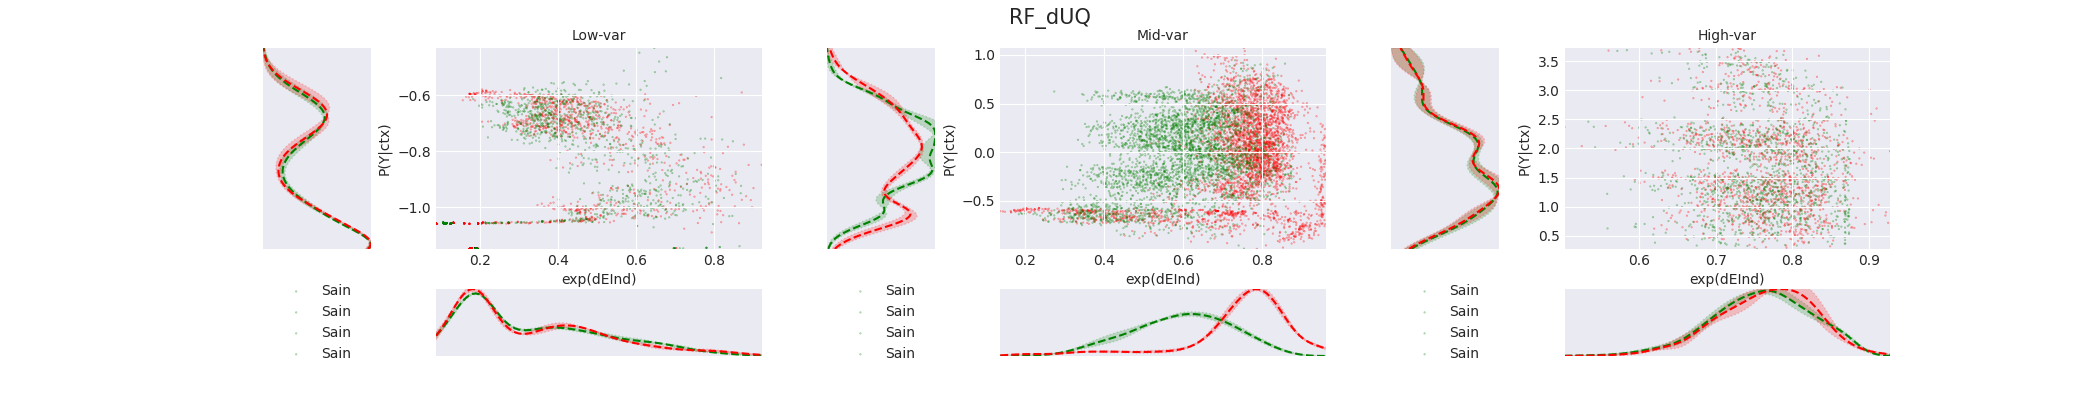

<IPython.core.display.Javascript object>


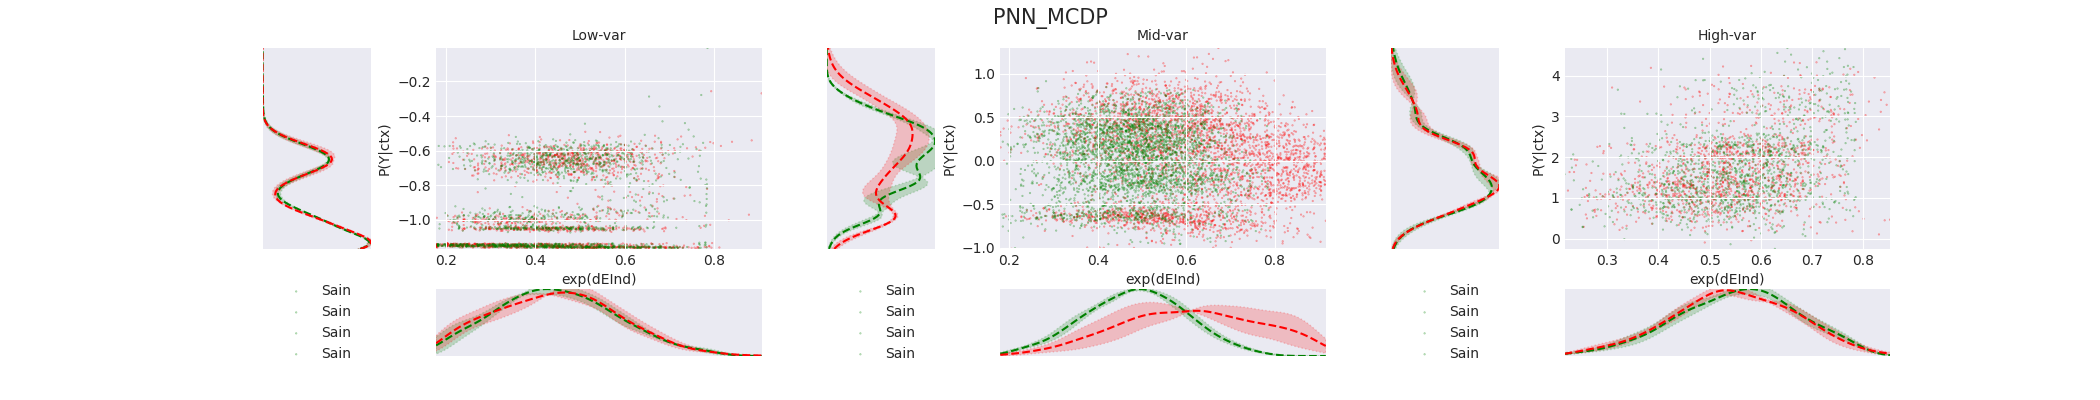

<IPython.core.display.Javascript object>


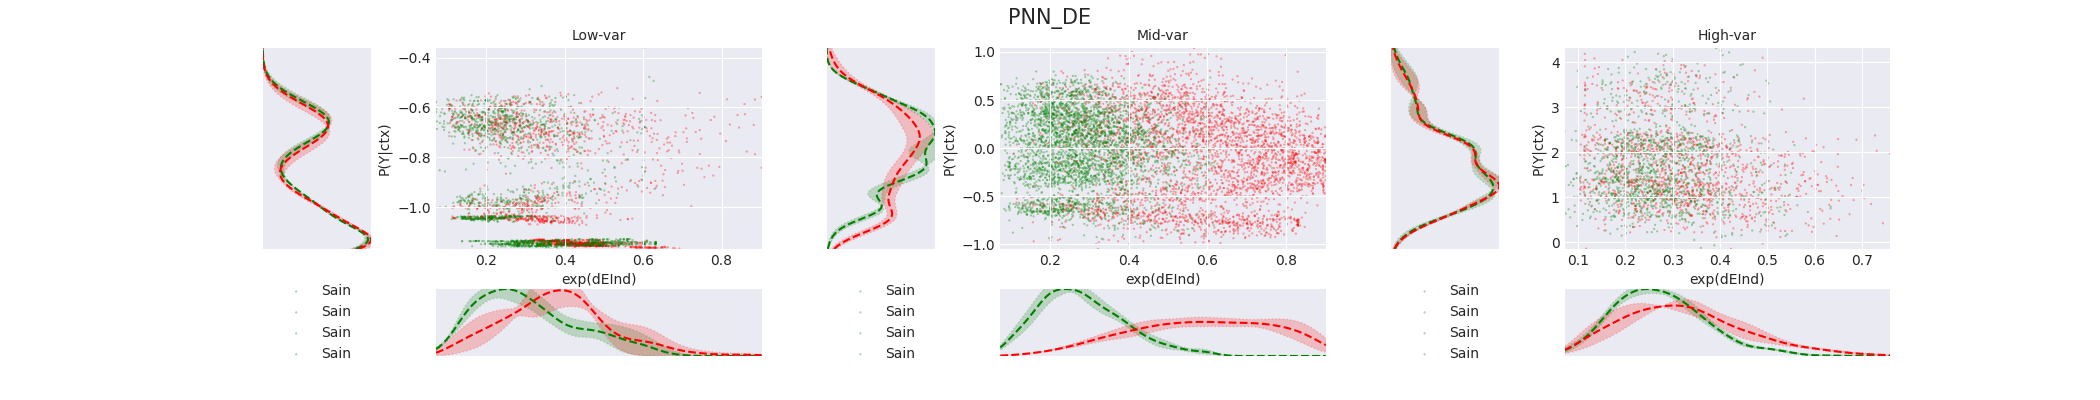

<IPython.core.display.Javascript object>


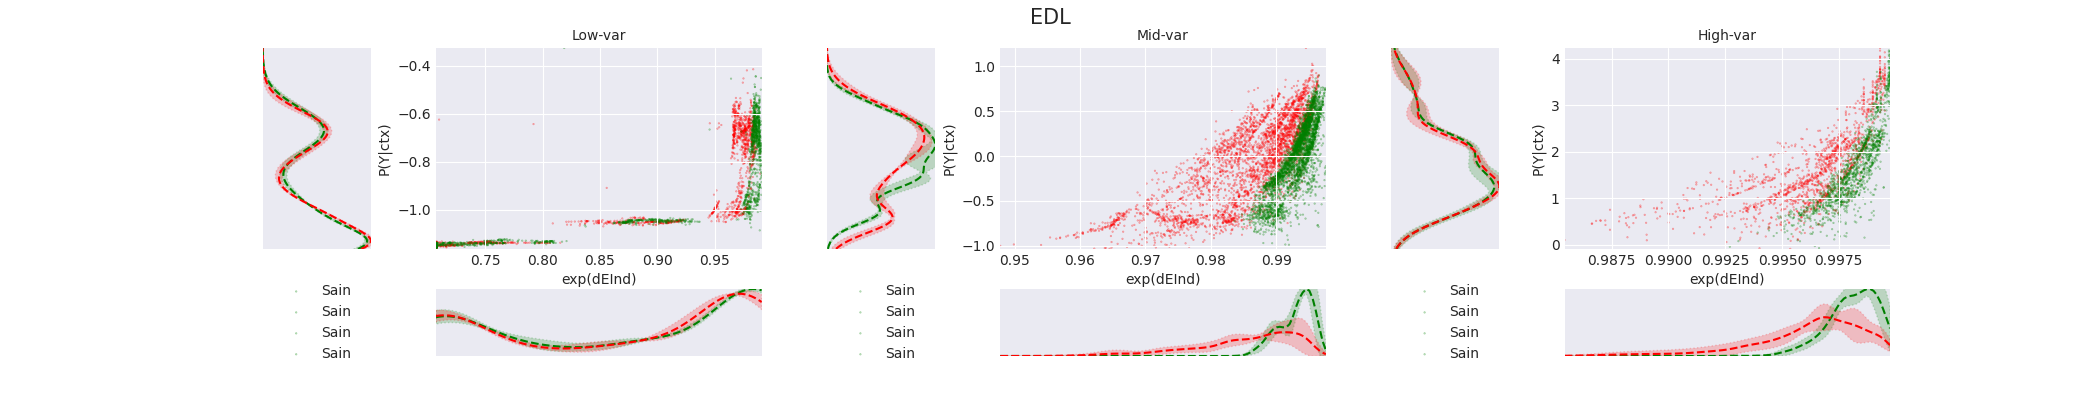

In [9]:
#A Graphic of Conditional distribution of dIndicator according to the subset

from abench.benchmark import revoring_models_outputs
from uqmodels.utils import cut
list_list_cv_attack= [[a,b]  for a,b in zip(cv_list_norm,cv_list_deg)]
list_model = list_name_norm
list_y,list_set_model_outputs,list_context,list_split = revoring_models_outputs(storing,list_model,list_list_cv_attack)
list_y_plot = [[np.array([pred[:,0]  for pred,varA,varE in list_outputs]) for list_outputs in list_model_outputs] for list_model_outputs in list_set_model_outputs]# dEIndicator
list_x_plot = [[np.array([np.exp(cut(-0.5*np.log(1+(varA[:,0]/varE[:,0])),0.01,0.99))  for pred,varA,varE in list_outputs]) for list_outputs in list_model_outputs] for list_model_outputs in list_set_model_outputs]# dEIndicator
label = ['Sain','degraded']
cl = ['green','red']
from src.visu import plot_density_cv
for n,name_model in enumerate(list_model): 
    plot_density_cv(list_x_plot[n],list_y_plot[n],list_context,label,cl,list_subset_name,suptitle=name_model,pb_cut=0.3,xlabel='exp(dEInd)',ylabel='P(Y|ctx)')

<IPython.core.display.Javascript object>


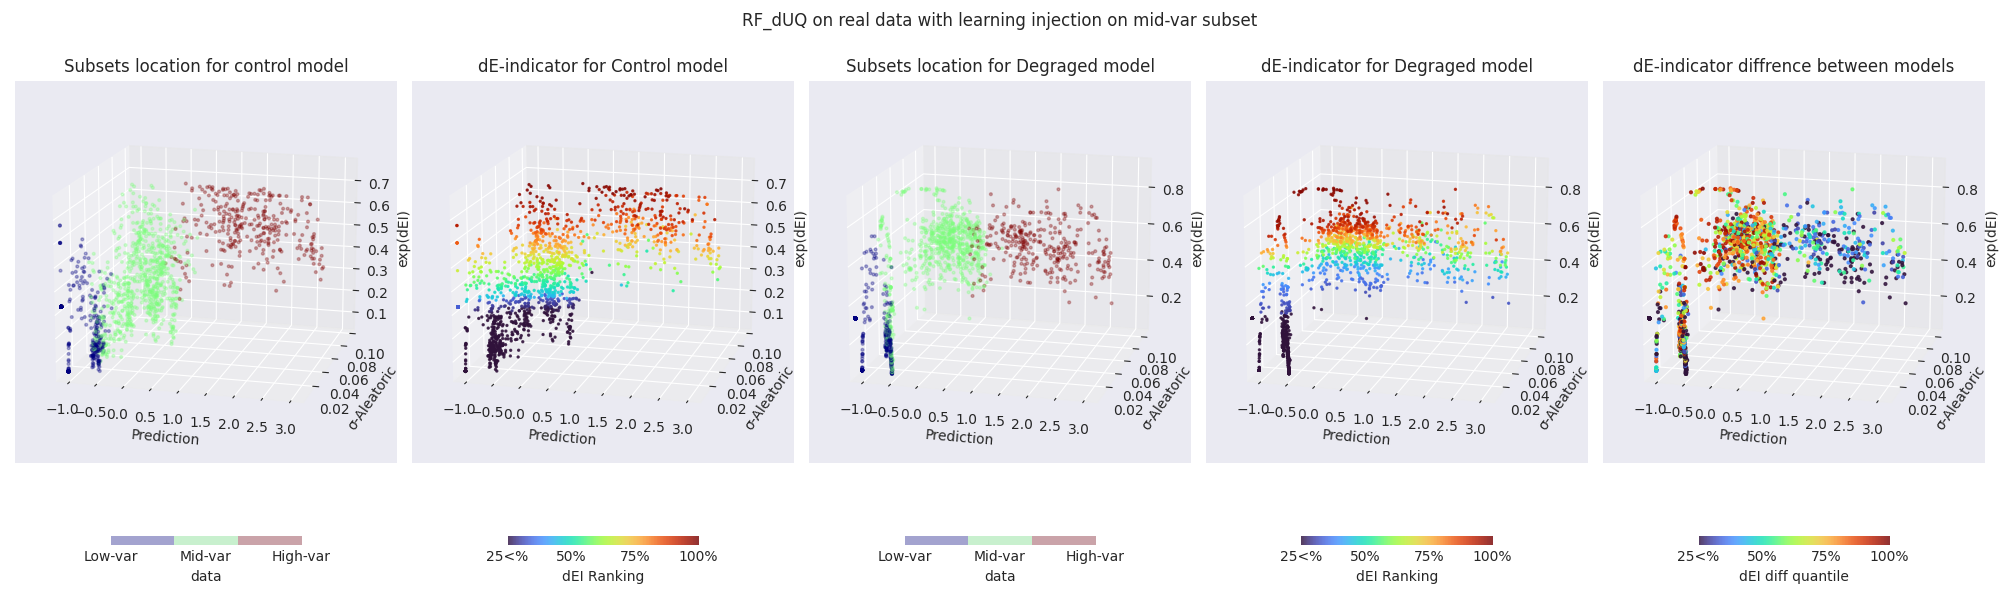

<IPython.core.display.Javascript object>


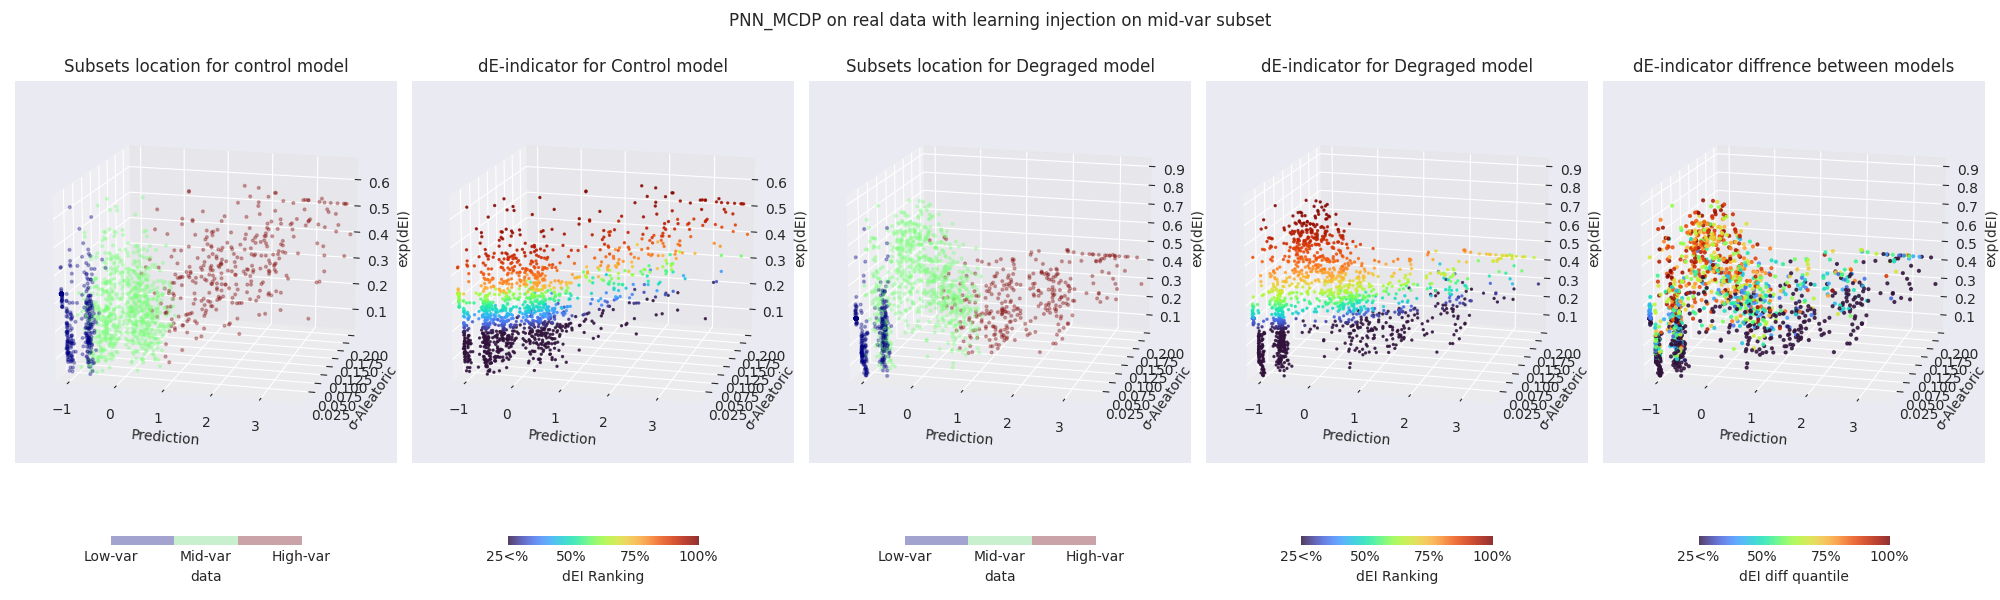

<IPython.core.display.Javascript object>


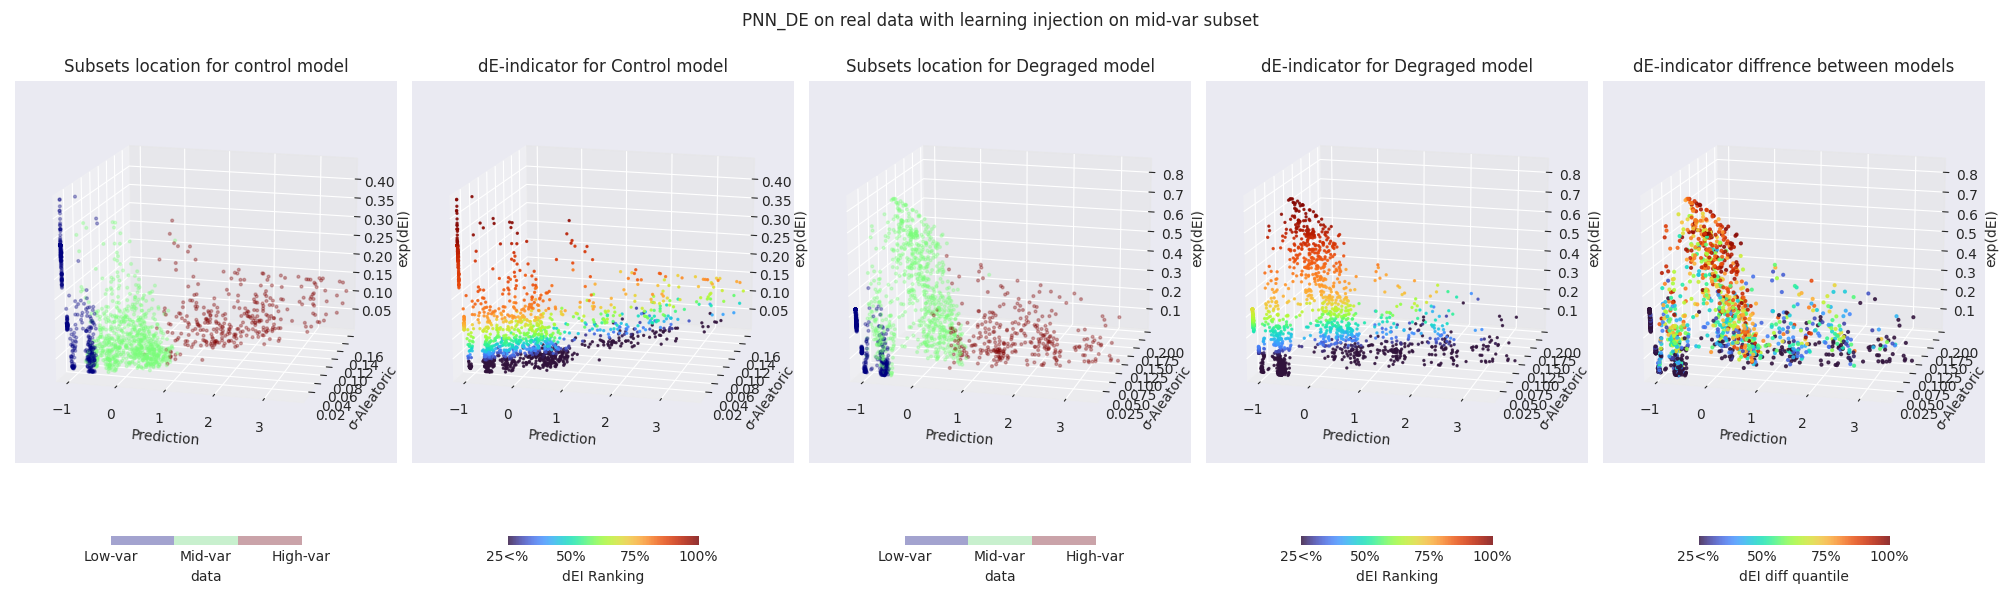

<IPython.core.display.Javascript object>


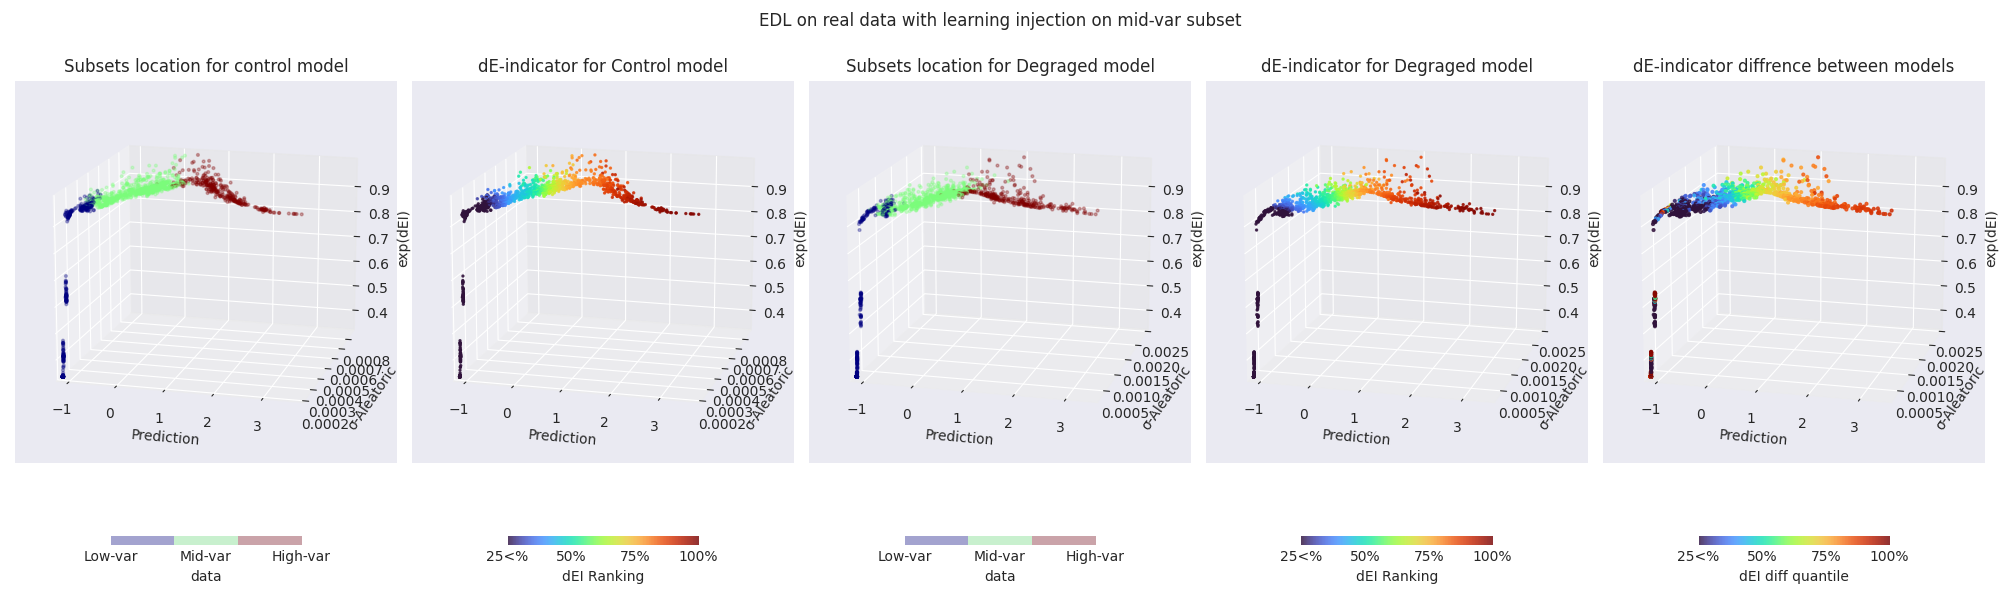

In [10]:
# Draw the dUQ indicator spaces for model on a sp

from src.visu import dUQ_space_plot
list_cv_comparison =[[a,b] for a,b in zip(cv_list_norm,cv_list_deg)][0]
dUQ_space_plot(storing,list_cv_comparison,list_subset_name,list_name_norm)

# Synthesis of results of all learning variability injection experiments

<IPython.core.display.Javascript object>


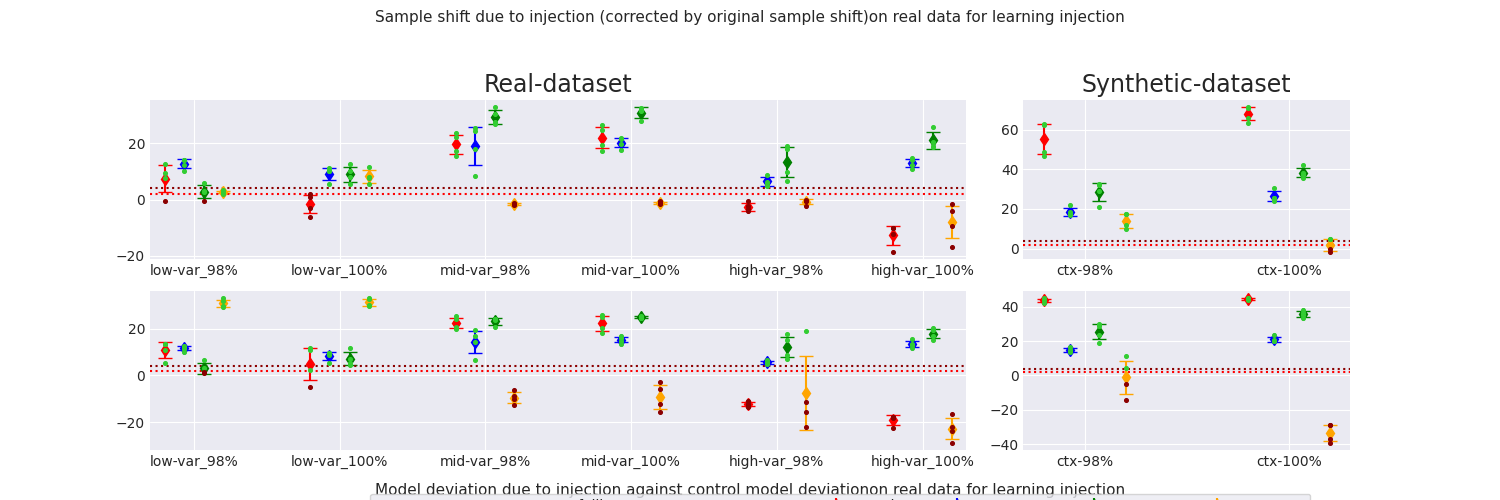

In [24]:
import numpy as np
import scipy

from scipy import stats as sstats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uqmodels.utils import cut
def test_b_greater_a(a,b):
    return(sstats.mannwhitneyu(a,b,alternative='greater'))

from src.Benchmark_UQ import compute_test

list_model =  ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
pos = [-0.2,-0.1,0,0.1,0.2]
list_res = []
for i in range(2):
    if(i==0): #real data
        storing = path +'results/Benchmark_real_injection_learning'
        list_exp = ["deg0_seq98","deg0_seq100","deg1_seq98","deg1_seq100","deg2_seq98","deg2_seq100"]
        ind_ctx_attack = [1,0,0,1,1,2,2]
        list_list_cv_attack=[['cv_0','cv_0_deg0_seq98','cv_0_deg0_seq100','cv_0_deg1_seq98','cv_0_deg1_seq100','cv_0_deg2_seq98','cv_0_deg2_seq100'],
                             ['cv_1','cv_1_deg0_seq98','cv_1_deg0_seq100','cv_1_deg1_seq98','cv_1_deg1_seq100','cv_1_deg2_seq98','cv_1_deg2_seq100'],
                             ['cv_0_bis1','cv_0_deg0_seq98_bis1','cv_0_deg0_seq100_bis1','cv_0_deg1_seq98_bis1','cv_0_deg1_seq100_bis1','cv_0_deg2_seq98_bis1','cv_0_deg2_seq100_bis1'],
                             ['cv_1_bis1','cv_1_deg0_seq98_bis1','cv_1_deg0_seq100_bis1','cv_1_deg1_seq98_bis1','cv_1_deg1_seq100_bis1','cv_1_deg2_seq98_bis1','cv_1_deg2_seq100_bis1']]


    else:
        storing = path +'results/Benchmark_synthetic_injection_learning'
        list_exp = ["deg_seq98","deg_seq100"]
        ind_ctx_attack = [1,1,1]
        list_list_cv_attack=[['cv_0','cv_0_deg1_seq97','cv_0_deg1_seq100'],
                             ['cv_1','cv_1_deg1_seq97','cv_1_deg1_seq100'],
                             ['cv_0_bis1','cv_0_deg1_seq97_bis1','cv_0_deg1_seq100_bis1'],
                             ['cv_1_bis1','cv_1_deg1_seq97_bis1','cv_1_deg1_seq100_bis1']]
    # Compute WmW and Wrank tests :
    res= compute_test(storing,list_exp,list_list_cv_attack,list_model,ind_ctx_attack)
    list_res.append(res)

list_model = ['RF_dUQ','BNN_MCD','BNN_DE','MLP_EDL']
pos = [-0.2,-0.07,0.07,0.2]
subtitle = ['Real-dataset','Synthetic-dataset']
list_exp = [["low-var_98%","low-var_100%","mid-var_98%","mid-var_100%","high-var_98%","high-var_100%"],['ctx-98%','ctx-100%']]
colors = ['red','blue','green','orange','cyan','lime']

import src.visu as visu
visu.Synthesis_dUQ_test(list_res,list_model,pos,subtitle,list_exp,colors)

# Study about impact of hyperparameters

cv_0 len_train 6965
cv_1 len_train 8473
cv_0_bis1 len_train 6965


<IPython.core.display.Javascript object>


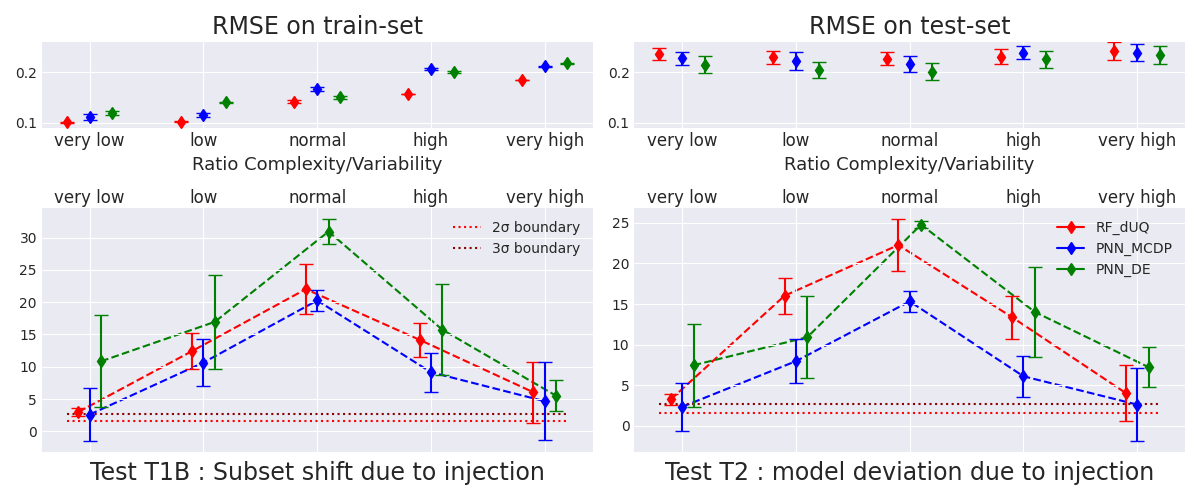

In [39]:
import matplotlib.pyplot as plt
from uqmodels.utils import cut
from uqmodels.store import read
import scipy
import scipy.stats as sstats
%matplotlib notebook
def test_b_greater_a(a,b):
    return(sstats.mannwhitneyu(a,b,alternative='greater'))
    
storing = path+'results/Benchmark_real_injection_learning/'
list_exp = ["nominal","deg1_seq100"]
n_exp = len(list_exp)
list_model = ['RF_dUQ_very_low','RF_dUQ_low','RF_dUQ','RF_dUQ_high','RF_dUQ_very_high',
             'PNN_MCDP_very_low','PNN_MCDP_low','PNN_MCDP','PNN_MCDP_high','PNN_MCDP_very_high',
             'PNN_DE_very_low','PNN_DE_low','PNN_DE','PNN_DE_high','PNN_DE_very_high']

colors =  ['black','lightgrey','gray','dimgray','darkgoldenrod','gold','orange','darkorange','darkred','pink','tomato','red',
          'darkgreen','lightgreen','lawngreen','green','darkblue','lightblue','cyan','teal','darkblue']

ind_ctx_attack = [1,1]
list_list_cv_attack=[['cv_1','cv_1_deg1_seq100'],['cv_0','cv_0_deg1_seq100'],['cv_1_bis1','cv_1_deg1_seq100_bis1'],['cv_0_bis1','cv_0_deg1_seq100_bis1']]

# Compute WmW and Wrank tests :
res= compute_test(storing,list_exp,list_list_cv_attack,list_model,ind_ctx_attack)
list_exp = ["deg1_seq100"]

#Recovering and store RMSE performance                
from abench.benchmark import evaluate
from src.Benchmark_UQ import rmse,average_coverage,sharpness,Gaussian_NLL
from abench.benchmark import Generic_metric

cv_list = ['cv_0','cv_1','cv_0_bis1','cv_0_bis1']
list_name = ['RF_dUQ_very_low','RF_dUQ_low','RF_dUQ','RF_dUQ_high','RF_dUQ_very_high',
             'PNN_MCDP_very_low','PNN_MCDP_low','PNN_MCDP','PNN_MCDP_high','PNN_MCDP_very_high',
             'PNN_DE_very_low','PNN_DE_low','PNN_DE','PNN_DE_high','PNN_DE_very_high']
list_ctx_constraint=None #[(-2,None,0.5)]
list_metrics = [Generic_metric(rmse,'Rmse_all', mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True),
                Generic_metric(Gaussian_NLL,"NLL", mask=None,list_ctx_constraint=None,reduce=True),
                Generic_metric(average_coverage,"Cov_all", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True),
                Generic_metric(sharpness,"Aw", mask=None,list_ctx_constraint=list_ctx_constraint,reduce=True,type_var='all')]
dict_perf = evaluate(storing, list_name, list_metrics,cv_list=cv_list,verbose=0)


metrics = ['Rmse_all','Rmse_all']
res_b = np.zeros((3,5,2,4))
list_name = list_model 
for n,name in enumerate(list_name):
    for nn,m in enumerate(metrics):
        if(nn==0):
            res_b[n//5,n%5,nn,0] = dict_perf[name][m][0]
            res_b[n//5,n%5,nn,1] = dict_perf[name][m][1]
        else:
            res_b[n//5,n%5,nn,0] = dict_perf[name][m][2]
            res_b[n//5,n%5,nn,1] = dict_perf[name][m][3]
            
# Study about impact of hyperparameters
import src.visu as visu
pos=[-0.2,0,0.2]
colors = ['red','blue','green']
list_marker = ["d","d","d","d","d","d"]
visu.HP_studies_plot(res_b,res,list_model,colors,list_marker,pos)

<IPython.core.display.Javascript object>


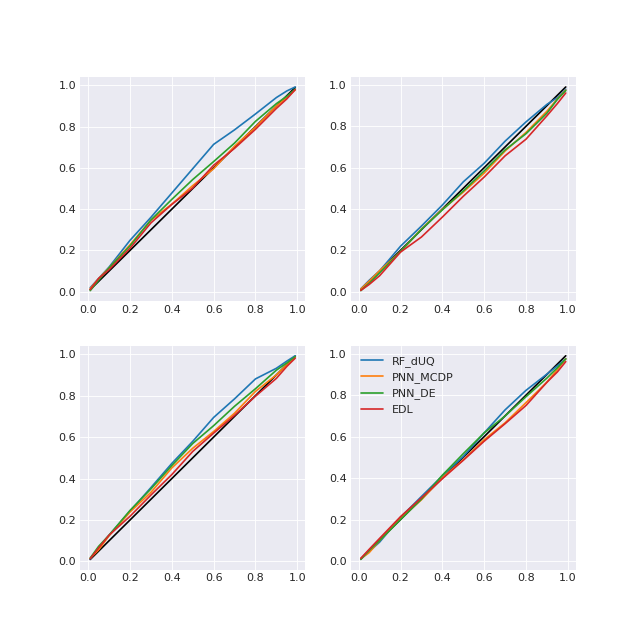

In [39]:
# Code pour figure multi couverture analysis
storing = path +'results/Benchmark_real_injection_learning'
list_model =  ['RF_dUQ','PNN_MCDP','PNN_DE','EDL']
list_cv = ['cv_0','cv_1','cv_0_bis1','cv_1_bis1']
from src.Benchmark_UQ import calibrate_var
list_q = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
plt.figure(figsize=(8,8))
for cv_ind,cv_name in enumerate(list_cv):
    plt.subplot(2,2,cv_ind+1)
    list_cov=[]
    _,y,split,context,_,_ =get_dataset(storing,cv_name)
    test = (split==0)
    for model_name in list_model:
        new_output = get_model_result(storing,model_name,cv_name)
        #new_output=calibrate_var(y,output,[test],reduce=True,mask=None,alpha=0.96,type_var='all')
        list_cov.append([])
        for q in list_q:
            list_cov[-1].append(average_coverage(y,new_output,[test&(context[:,-1]==1)],reduce=True,mask=None,alpha=q,type_var='all'))
    plt.plot(list_q,list_q,color='black',ls='-')
    for n,model_name in enumerate(list_model):
        plt.plot(list_q,list_cov[n][::-1],label=model_name)
plt.legend()
plt.show()